In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\2020\Downloads/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


checking for null values

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

dropping rows with null values

In [5]:
df=df.dropna()

Checking Categorical column's unique values

In [6]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

There are too many variables, we will reduce some dimensionality

In [10]:
# calculating the age of customers 
df['c_year'] = 2021
df['age'] = df['c_year']-df['Year_Birth']

# calculating the no of days as customers
df['c_date'] = '01-01-2015'
df['Dt_Customer'] =pd.to_datetime(df.Dt_Customer)
df['c_date'] = pd.to_datetime(df.c_date)
df['days_customer'] = (df['c_date']-df['Dt_Customer']).dt.days

# reducing some dimensions 

# defining two categories of expenses as on food ( fish+meat+ fruit) and as leisure_Expense ( wine, sweet, Gold)
df['leisure_Expense'] = df['MntWines']+ df['MntSweetProducts']+ df['MntGoldProds']
df['food'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts']

# defining accepted_any_cmp if customer have ever taken any campaign offer ( 1- yes, 0-no)
df['accepted_any_cmp']= df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['accepted_any_cmp']= np.where(df['accepted_any_cmp'] > 0, 1, 0)

# defining martial status as ( 0- single adult, 1- two adults)
mapping = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd': 0, 'YOLO': 0, 'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
df=df.replace({'Marital_Status': mapping, 'Education': mapping}) 

df['kid_teen'] = df['Kidhome'] + df['Teenhome']
df['kid_teen']= np.where(df['kid_teen'] > 0, 1, 0)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'c_year', 'age', 'c_date', 'days_customer', 'leisure_Expense', 'food',
       'accepted_any_cmp', 'kid_teen'],
      dtype='object')

Dropping some unwanted columns

In [11]:
df=df[['Education', 'Marital_Status', 'Income', 'kid_teen',
       'Recency','leisure_Expense', 'food', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'accepted_any_cmp', 
       'Complain', 'age', 'days_customer']]

Applying Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)

Finding optimal number of clusters using Elbow method

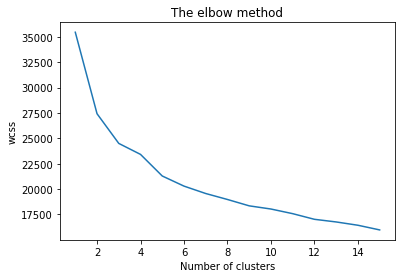

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

To plot a 2D graph we will use PCA to convert the dataset in 2 components

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

Fitting K-Means

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

printing segmented cluster values

In [16]:
print(y_kmeans)

[3 1 0 ... 2 0 4]


Plotting clusters of customers

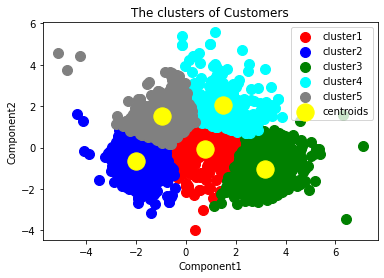

In [17]:
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='cluster1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='cluster2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='cluster3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label='cluster4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans == 4, 1], s = 100, c = 'gray', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('The clusters of Customers')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend()
plt.show()